# The USD / EUR exchange rate



In [1]:
# import relevant packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

Download historical exchange rate data for the DKK/USD currency pair using Yahoo Finance. Use '2006-01-01' as start date. 

### Solution

In [2]:
fx_data = yf.download('DKKUSD=X', start='2006-01-01')

C:\Users\johan\AppData\Local\Temp\ipykernel_25812\1943079332.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = yf.download('DKKUSD=X', start='2006-01-01')
[*********************100%***********************]  1 of 1 completed


In [3]:
fx_data.head()

Price,Close,High,Low,Open,Volume
Ticker,DKKUSD=X,DKKUSD=X,DKKUSD=X,DKKUSD=X,DKKUSD=X
Date,,,,,
2006-01-02,0.158336,0.158897,0.158479,0.158607,0
2006-01-03,0.161267,0.159360,0.159109,0.159284,0
2006-01-04,0.162356,0.162425,0.161645,0.161715,0
2006-01-05,0.162290,0.162198,0.161993,0.162198,0
2006-01-06,0.162798,0.163100,0.162030,0.162077,0


## Problem 2

Define two `pd.Series` with the DKK / USD and USD / DKK exchange rate using the closing price. 

### Solution

In [4]:
# define two pandas series with the FX cross
dkkusd = fx_data['Close']
usddkk = 1.0 / dkkusd

# define the inverse cross
log_dkkusd = np.log(dkkusd)
log_usddkk = np.log(usddkk)

## Problem 3

Plot the time series of the exchanges rates and the natural logarithm of the exhanges rates in two seperate figures. 

### Solution


Text(0, 0.5, 'USDDKK')

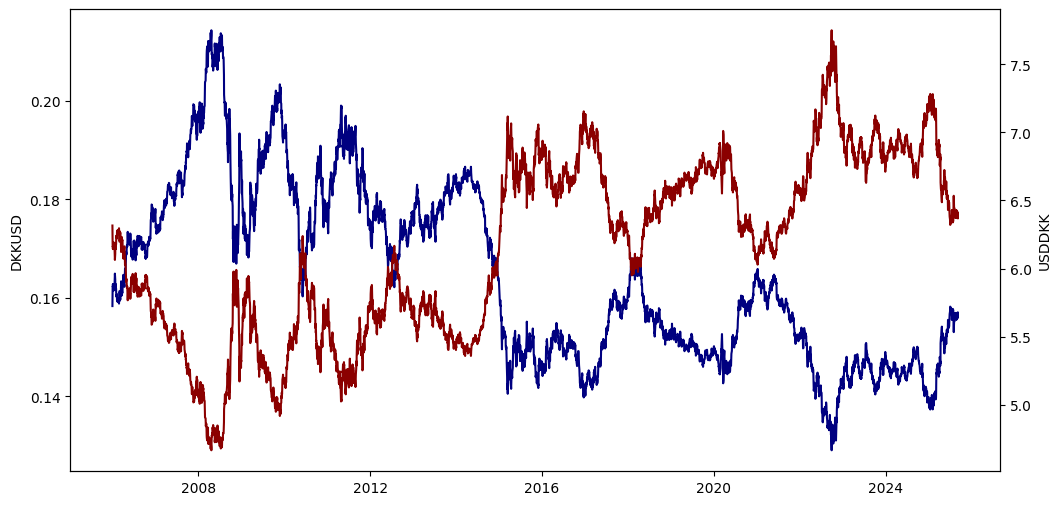

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dkkusd.index, dkkusd, label="", color="navy")
ax.set_ylabel('DKKUSD')

ax = ax.twinx()

ax.plot(usddkk.index, usddkk, label="", color="darkred")
ax.set_ylabel('USDDKK')

Text(0, 0.5, 'log USDDKK')

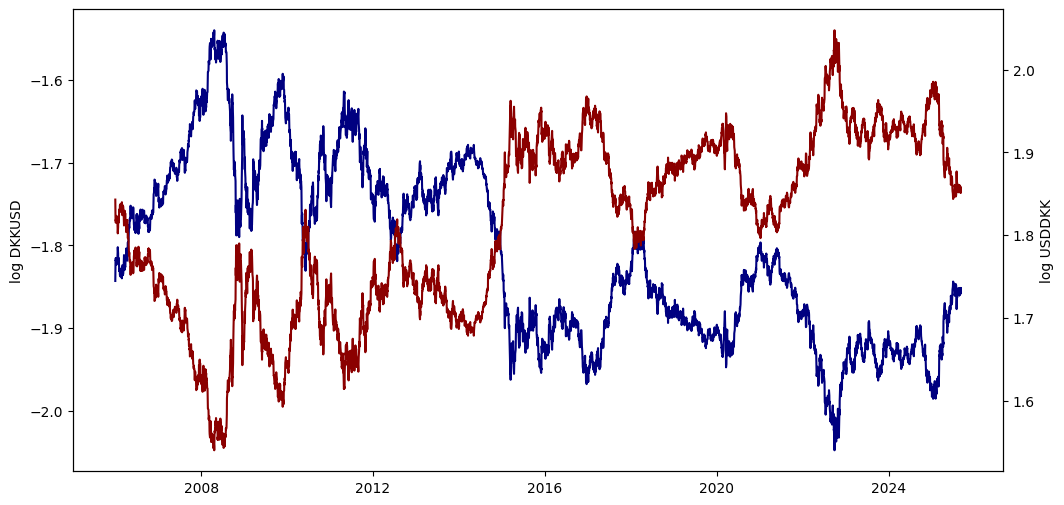

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dkkusd.index, log_dkkusd, label="", color="navy")
ax.set_ylabel('log DKKUSD')

ax = ax.twinx()

ax.plot(usddkk.index, log_usddkk, label="", color="darkred")
ax.set_ylabel('log USDDKK')

## Problem 4

Plot the density of the weekly changes in the natural logarithm of DKK / USD for both the first and second half of the sample. Use either a histogram from the `matplotlib` package or `seaborn.kdeplot`. 

### Solution

In [7]:
dkkusd.resample('W').last().diff().dropna()

Ticker,DKKUSD=X
Date,
2006-01-15,-0.000021
2006-01-22,-0.000114
2006-01-29,-0.000562
2006-02-05,-0.001070
2006-02-12,-0.001594
...,...
2025-08-10,0.003385
2025-08-17,-0.000335
2025-08-24,-0.000514


In [8]:
#weekly_chg_dkkusd = dkkusd.resample('W').last().pct_change().dropna()

# resample data weekly
weekly_chg_log_dkkusd = log_dkkusd.resample('W').last().diff().dropna()

# calculate half-point
half_point = int(len(weekly_chg_log_dkkusd) / 2)

In [15]:
weekly_chg_log_dkkusd[:half_point].values.flatten()

array([-1.30258340e-04, -6.99639302e-04, -3.45876677e-03, -6.62414777e-03,
       -9.95025220e-03,  3.14582311e-03, -3.62408685e-03,  1.22982193e-02,
       -9.95284222e-03,  2.24859139e-02, -1.26781851e-02,  6.76555324e-03,
        2.92285187e-04, -9.74157288e-04,  1.96341191e-02,  2.32070798e-02,
        7.82275264e-03,  1.56060713e-02, -1.23912896e-02, -2.78798359e-03,
        1.33081375e-02, -2.04899113e-02,  1.03486179e-03, -1.16951888e-02,
        2.20870627e-02,  6.51948789e-04, -1.16547034e-02,  3.68822842e-03,
        4.62512367e-03,  8.93519284e-03, -1.23165887e-02,  8.38902873e-03,
       -5.40100156e-03,  6.76014403e-03, -1.36107825e-02, -3.90523775e-04,
        9.15819022e-03, -6.33607514e-03, -6.85437968e-03, -6.50536233e-03,
        7.55417530e-03,  1.00877916e-02, -1.93005455e-03,  1.02742095e-02,
       -3.44741115e-04,  1.98608468e-02,  1.78801249e-02, -1.00437215e-02,
       -9.69817808e-03,  3.16359265e-03,  5.22424229e-03, -1.55218993e-02,
       -4.32897862e-03,  

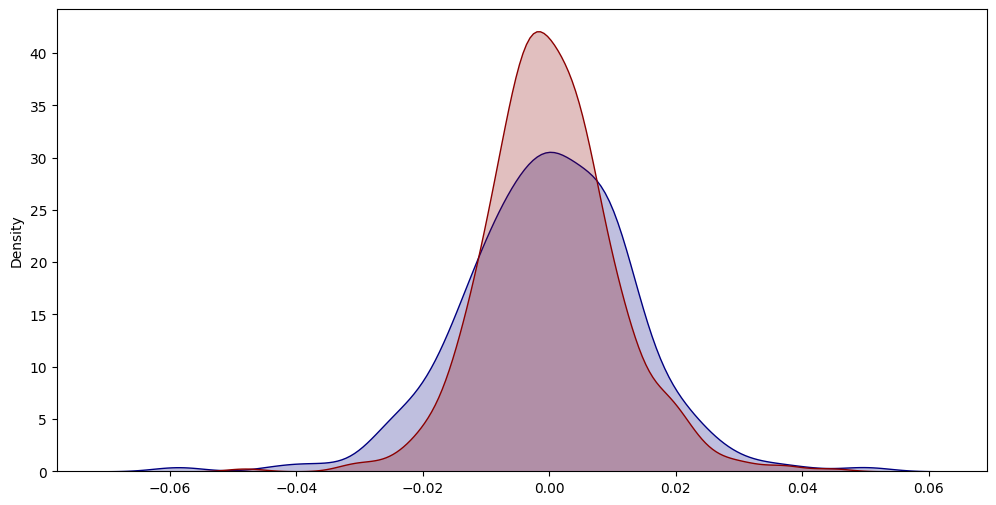

In [18]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(weekly_chg_log_dkkusd[:half_point].values.flatten(),
            fill=True, color="navy", label="First-half", ax=ax)
sns.kdeplot(weekly_chg_log_dkkusd[half_point: ].values.flatten(),
            fill=True, color="darkred", label="Second-half", ax=ax);

## Problem 5

Plot a scatter plot between the weekly changes in the natural logarithm of DKK / USD and its lagged value. 

### Solution

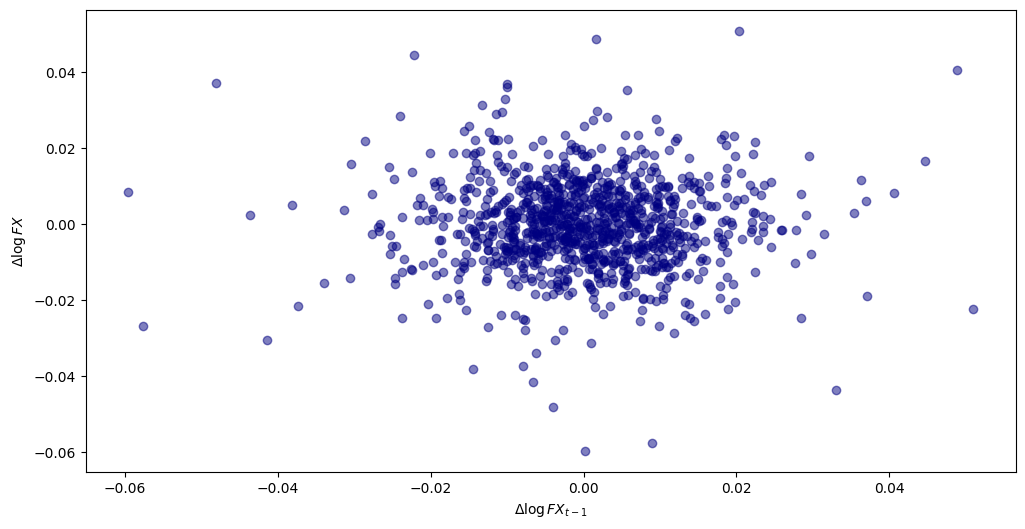

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

pd.plotting.lag_plot(weekly_chg_log_dkkusd, alpha=0.5, ax=ax, c="navy") # using pandas functionality
ax.set_xlabel('$\\Delta \\log FX_{t-1}$')
ax.set_ylabel('$\\Delta \\log FX$');

plt.show()

## Problem 6

Plot the autocorrelation function for the weekly changes in the natural logarithm of DKK / USD.

### Solution

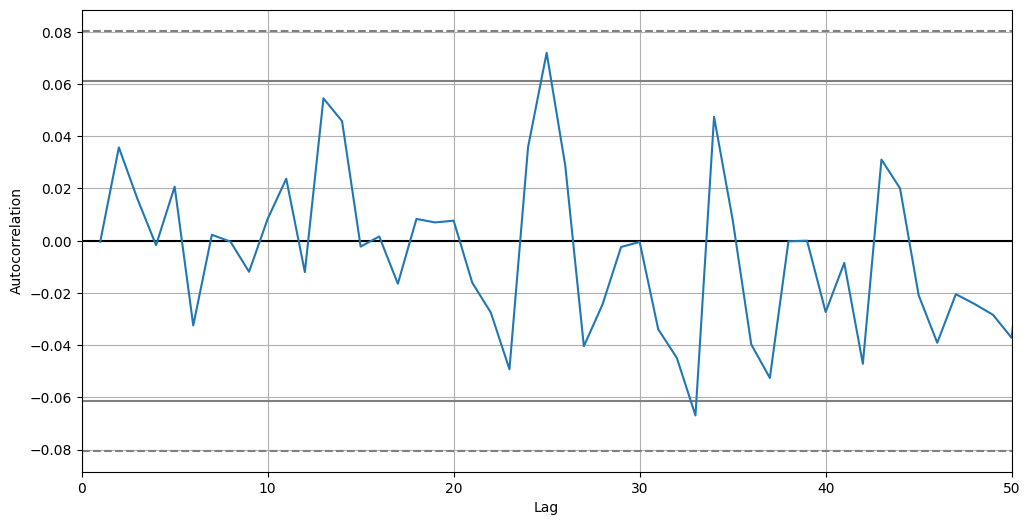

In [11]:
"""
No significant serial correlation!
"""

fig, ax = plt.subplots(figsize=(12, 6))
ax = pd.plotting.autocorrelation_plot(weekly_chg_log_dkkusd.dropna(), ax=ax)
ax.set_xlim([0, 50]);

plt.show()